In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-superstore/global_superstore.xlsx


In [2]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Import dataset
df = pd.read_excel('/kaggle/input/global-superstore/global_superstore.xlsx')

In [4]:
# convert column names to lower case
df.columns = df.columns.str.lower()

In [5]:
df.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'city', 'state', 'country',
       'postal code', 'market', 'region', 'product id', 'category',
       'sub-category', 'product name', 'sales', 'quantity', 'discount',
       'profit', 'shipping cost', 'order priority'],
      dtype='object')

In [6]:
# check first 5 observations
df.head()

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,city,state,...,product id,category,sub-category,product name,sales,quantity,discount,profit,shipping cost,order priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [7]:
# check rows and columns
df.shape

(51290, 24)

In [8]:
# check dtypes
df.dtypes

row id                     int64
order id                  object
order date        datetime64[ns]
ship date         datetime64[ns]
ship mode                 object
customer id               object
customer name             object
segment                   object
city                      object
state                     object
country                   object
postal code              float64
market                    object
region                    object
product id                object
category                  object
sub-category              object
product name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping cost            float64
order priority            object
dtype: object

In [9]:
# check if the dataset has null values
df.isnull().sum()

row id                0
order id              0
order date            0
ship date             0
ship mode             0
customer id           0
customer name         0
segment               0
city                  0
state                 0
country               0
postal code       41296
market                0
region                0
product id            0
category              0
sub-category          0
product name          0
sales                 0
quantity              0
discount              0
profit                0
shipping cost         0
order priority        0
dtype: int64

In [10]:
# drop column postal code because it's of no use
df.drop(columns=['postal code'],inplace = True, axis = 1)

In [11]:
# check row and column to know if the column is deleted
df.shape

(51290, 23)

In [12]:
# 5 - point summary
df.describe()

,row id,sales,quantity,discount,profit,shipping cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [13]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row id          51290 non-null  int64         
 1   order id        51290 non-null  object        
 2   order date      51290 non-null  datetime64[ns]
 3   ship date       51290 non-null  datetime64[ns]
 4   ship mode       51290 non-null  object        
 5   customer id     51290 non-null  object        
 6   customer name   51290 non-null  object        
 7   segment         51290 non-null  object        
 8   city            51290 non-null  object        
 9   state           51290 non-null  object        
 10  country         51290 non-null  object        
 11  market          51290 non-null  object        
 12  region          51290 non-null  object        
 13  product id      51290 non-null  object        
 14  category        51290 non-null  object        
 15  su

In [14]:
# counts unique value in each row
df.nunique()

row id            51290
order id          25035
order date         1430
ship date          1464
ship mode             4
customer id        1590
customer name       795
segment               3
city               3636
state              1094
country             147
market                7
region               13
product id        10292
category              3
sub-category         17
product name       3788
sales             24988
quantity             14
discount             27
profit            27085
shipping cost     16936
order priority        4
dtype: int64

**EDA**

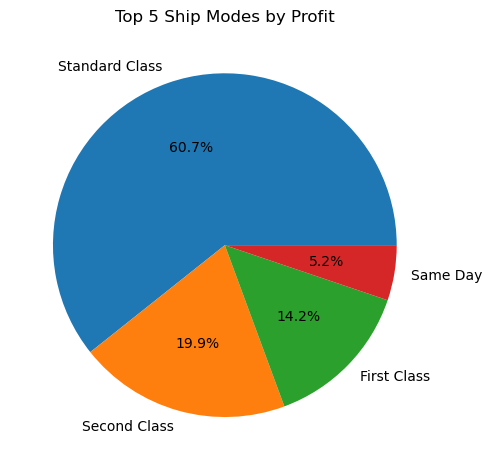

In [15]:
# Calculate the top 5 profits by shipment mode
top_5_profit_ship_modes = df.groupby('ship mode')['profit'].sum().nlargest(5)
top_5_profit_ship_modes
# Plotting the pie chart
plt.pie(top_5_profit_ship_modes, labels=top_5_profit_ship_modes.index, autopct='%1.1f%%')
plt.title('Top 5 Ship Modes by Profit')
plt.tight_layout()
plt.show()

**from the above graph it is understood that the standard class is giving 55.5 % more profit than the same day ship mode.**

region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
Name: sales, dtype: float64


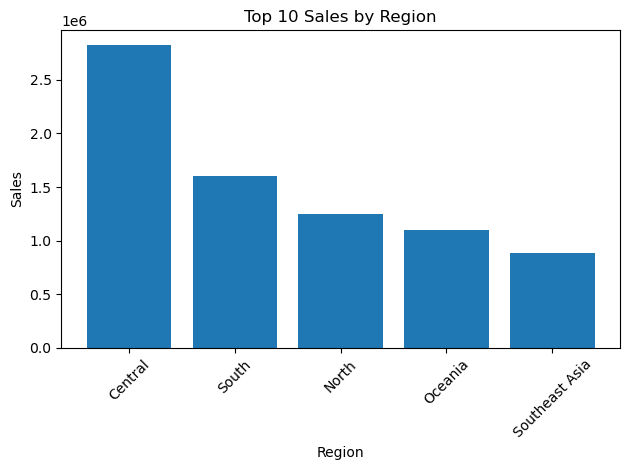

In [16]:
# Calculate the top 5 sales by region
top_5_sales_regions = df.groupby('region')['sales'].sum().nlargest(5)
print(f"{top_5_sales_regions}")
# Plotting the bar chart
plt.bar(top_5_sales_regions.index, top_5_sales_regions)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Top 10 Sales by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Maximum sales are coming from central region**

product name
Canon imageCLASS 2200 Advanced Copier    25199.9280
Cisco Smart Phone, Full Size             17238.5206
Motorola Smart Phone, Full Size          17027.1130
Hoover Stove, Red                        11807.9690
Sauder Classic Bookcase, Traditional     10672.0730
Name: profit, dtype: float64


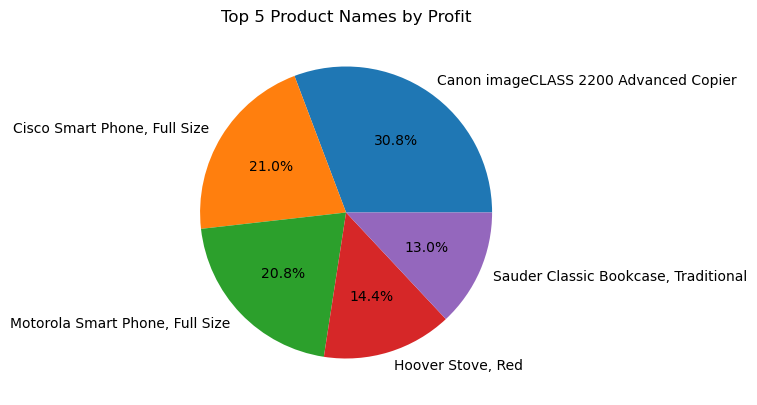

In [17]:
# Calculate the top 5 profits by shipment mode
top_5_profit_product_names = df.groupby('product name')['profit'].sum().nlargest(5)
print(top_5_profit_product_names)
# Plotting the pie chart
plt.pie(top_5_profit_product_names, labels=top_5_profit_product_names.index, autopct='%1.1f%%')
plt.title('Top 5 Product Names by Profit')
plt.tight_layout()
plt.show()

**Canon imageCLASS 2200 Advanced Copier gives more profit that is 30.8 % and minimum profit is from Sauder Classic Bookcase that is 13 %**

country
United States     2.297201e+06
Australia         9.252359e+05
France            8.589311e+05
China             7.005620e+05
Germany           6.288400e+05
Mexico            6.225906e+05
India             5.896501e+05
United Kingdom    5.285763e+05
Indonesia         4.048875e+05
Brazil            3.611064e+05
Name: sales, dtype: float64


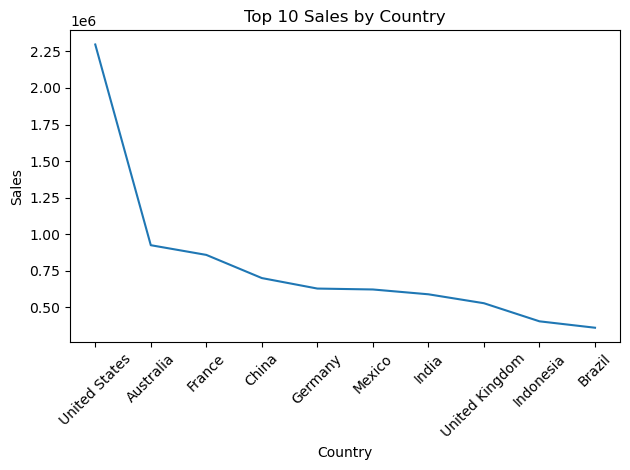

In [18]:
# Calculate the top 10 sales by region
top_10_sales_by_country = df.groupby('country')['sales'].sum().nlargest(10)
print(f"{top_10_sales_by_country}")
# Plotting the bar chart
plt.plot(top_10_sales_by_country.index, top_10_sales_by_country)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Top 10 Sales by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 The highest sale is coming from the country US that is 42.5% and brazil giving minimum sale of 4.6 %